## Librerías necesarias

In [1]:
import gc
from os import getcwd
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import gc
import seaborn as sns

from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler

pd.set_option("display.max_columns", 80)

## Carga del conjunto de datos

In [2]:
df = pd.read_csv('../Data Preprocess/preprocessed-SD.csv', sep=',', low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14597103 entries, 0 to 14597102
Data columns (total 23 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Dst Port           float64
 1   xhr                float64
 2   Fwd Pkt Len Max    float64
 3   Fwd Pkt Len Min    float64
 4   Fwd Pkt Len Mean   float64
 5   Bwd Pkt Len Min    float64
 6   Bwd Pkt Len Mean   float64
 7   Bwd IAT Tot        float64
 8   Bwd IAT Mean       float64
 9   Bwd IAT Max        float64
 10  Fwd PSH Flags      float64
 11  Fwd Pkts/s         float64
 12  Bwd Pkts/s         float64
 13  RST Flag Cnt       float64
 14  PSH Flag Cnt       float64
 15  ACK Flag Cnt       float64
 16  Init Fwd Win Byts  float64
 17  Init Bwd Win Byts  float64
 18  Fwd Seg Size Min   float64
 19  Idle Min           float64
 20  Protocol_6         int64  
 21  Protocol_17        int64  
 22  Label              int64  
dtypes: float64(20), int64(3)
memory usage: 2.5 GB


In [4]:
df.describe()

,Dst Port,xhr,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Max,Fwd PSH Flags,Fwd Pkts/s,Bwd Pkts/s,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,Idle Min,Protocol_6,Protocol_17,Label
count,1.459710e+07,1.459710e+07,1.459710e+07,1.459710e+07,1.459710e+07,1.459710e+07,1.459710e+07,1.459710e+07,1.459710e+07,1.459710e+07,1.459710e+07,1.459710e+07,1.459710e+07,1.459710e+07,1.459710e+07,1.459710e+07,1.459710e+07,1.459710e+07,1.459710e+07,1.459710e+07,1.459710e+07,1.459710e+07,1.459710e+07
mean,1.452465e-01,4.963900e-01,8.862667e-02,1.904522e-02,3.358335e-02,2.108649e-02,5.084941e-02,9.632938e-03,1.114897e-02,1.377870e-02,3.919470e-02,6.777235e-03,8.404827e-03,1.703621e-01,3.620142e-01,3.358283e-01,1.223910e-01,1.393174e-01,3.179708e-01,1.269802e-02,7.015154e-01,2.853078e-01,4.288833e-01
std,2.953016e-01,2.593562e-01,1.415278e-01,3.379479e-02,3.862349e-02,3.839118e-02,6.461306e-02,6.340811e-02,4.771296e-02,4.559953e-02,1.940579e-01,3.739129e-02,4.757323e-02,3.759506e-01,4.805829e-01,4.722792e-01,2.354339e-01,3.235936e-01,1.420988e-01,7.316006e-02,4.575932e-01,4.515610e-01,1.022492e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.087282e-04,2.588190e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.546002e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.428571e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.220722e-03,5.000000e-01,1.918347e-02,0.000000e+00,2.429823e-02,0.000000e+00,3.307921e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.952569e-05,2.888951e-06,0.000000e+00,0.000000e+00,0.000000e+00,4.257202e-03,0.000000e+00,3.571429e-01,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
75%,5.171283e-02,7.071068e-01,7.919331e-02,5.128205e-02,4.180838e-02,4.102564e-02,7.537721e-02,4.942583e-04,1.493844e-03,1.487633e-03,0.000000e+00,5.868545e-04,5.040323e-04,0.000000e+00,1.000000e+00,1.000000e+00,1.250153e-01,3.448486e-03,3.571429e-01,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,6.000000e+00


Text(0.5, 1.0, 'Distribución del tráfico')

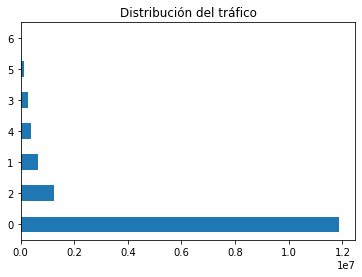

In [5]:
df['Label'].value_counts().plot(kind='barh')
plt.title('Distribución del tráfico')

## Tratamiento del conjunto

In [6]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [7]:
y = df.pop('Label')
X = df.values

In [8]:
# Partición del conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [14]:
test_df = pd.DataFrame(X_test)
test_df.columns = df.columns
test_df['Label'] = np.array(y_test)

test_df

,Dst Port,xhr,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Max,Fwd PSH Flags,Fwd Pkts/s,Bwd Pkts/s,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,Idle Min,Protocol_6,Protocol_17,Label
0,0.000809,0.866025,0.017708,0.057692,0.024992,0.087179,0.064532,2.333333e-07,0.000002,9.333333e-07,0.0,5.474622e-06,1.642387e-05,0.0,0.0,0.0,0.000000,0.000000,0.142857,0.000000,0.0,1.0,0
1,0.600595,0.258819,0.459911,0.000000,0.129822,0.000000,0.061459,2.080750e-04,0.000828,7.438667e-04,0.0,1.521617e-07,2.738911e-07,0.0,0.0,1.0,0.003357,0.003235,0.571429,0.053041,1.0,0.0,0
2,0.000809,0.000000,0.021643,0.070513,0.030546,0.052747,0.039044,0.000000e+00,0.000000,0.000000e+00,0.0,1.725328e-04,5.175983e-04,0.0,0.0,0.0,0.000000,0.000000,0.142857,0.000000,0.0,1.0,0
3,0.000809,0.000000,0.015740,0.051282,0.022216,0.093773,0.069412,0.000000e+00,0.000000,0.000000e+00,0.0,1.189626e-05,3.568879e-05,0.0,0.0,0.0,0.000000,0.000000,0.142857,0.000000,0.0,1.0,0
4,0.000809,0.707107,0.014757,0.048077,0.020827,0.033700,0.024945,0.000000e+00,0.000000,0.000000e+00,0.0,2.976190e-04,8.928571e-04,0.0,0.0,0.0,0.000000,0.000000,0.142857,0.000000,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4379126,0.006760,0.500000,0.022627,0.000000,0.017819,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,1.0,1.992032e-03,0.000000e+00,0.0,0.0,1.0,0.003952,0.000000,0.357143,0.000000,1.0,0.0,0
4379127,0.000809,0.707107,0.026070,0.084936,0.036794,0.132601,0.098153,0.000000e+00,0.000000,0.000000e+00,0.0,3.168568e-04,9.505703e-04,0.0,0.0,0.0,0.000000,0.000000,0.142857,0.000000,0.0,1.0,0
4379128,0.001221,0.866025,0.220364,0.000000,0.019916,0.000000,0.035365,9.196534e-01,0.563255,3.343887e-01,0.0,2.311267e-08,6.067076e-08,0.0,1.0,0.0,0.125015,0.014450,0.357143,0.096965,1.0,0.0,0
4379129,0.001221,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.0,3.210067e-05,0.000000e+00,0.0,0.0,1.0,0.499557,0.000000,0.357143,0.000000,1.0,0.0,2


In [15]:
test_df['Label'].value_counts()

0    3567467
2     378823
1     190047
4     114201
3      85642
5      42681
6        270
Name: Label, dtype: int64

In [16]:
test_df.to_csv('test-RF.csv', index=False)

In [17]:
del(test_df, X_test, y_test, X, y)
gc.collect()

67

In [18]:
del(df)
gc.collect()

20

In [19]:
# define pipeline
over = SMOTE()
under = RandomUnderSampler()
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X_train, y_train = pipeline.fit_resample(X_train, y_train)

In [21]:
train_df = pd.DataFrame(X_train)
train_df.columns = ['Dst Port', 'xhr', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Max', 'Fwd PSH Flags', 'Fwd Pkts/s', 'Bwd Pkts/s', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Seg Size Min', 'Idle Min', 'Protocol_6', 'Protocol_17']
train_df['Label'] = np.array(y_train)

train_df

,Dst Port,xhr,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Max,Fwd PSH Flags,Fwd Pkts/s,Bwd Pkts/s,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,Idle Min,Protocol_6,Protocol_17,Label
0,0.001221,0.707107,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.373947e-05,0.000000e+00,0.0,0.0,1.0,0.003876,0.000000,0.357143,0.0,1.0,0.0,0
1,0.798749,0.500000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,6.172840e-03,1.851852e-02,0.0,0.0,1.0,0.001770,0.003891,0.357143,0.0,1.0,0.0,0
2,0.001221,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,4.694836e-03,0.000000e+00,0.0,0.0,1.0,0.034180,0.000000,0.357143,0.0,1.0,0.0,0
3,0.762707,0.707107,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,4.166667e-03,1.250000e-02,0.0,0.0,1.0,0.000931,0.003937,0.357143,0.0,1.0,0.0,0
4,0.051713,0.707107,0.333005,0.0,0.099623,0.0,0.122478,0.017390,0.023077,0.031771,0.0,5.783445e-07,1.518154e-06,0.0,1.0,0.0,0.980240,0.959061,0.357143,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58248626,0.001221,0.707107,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,2.564103e-02,0.000000e+00,0.0,0.0,1.0,0.031311,0.000000,0.357143,0.0,1.0,0.0,6
58248627,0.001221,0.258819,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,6.996129e-04,0.000000e+00,0.0,0.0,1.0,0.031342,0.000000,0.357143,0.0,1.0,0.0,6
58248628,0.001221,0.258819,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,2.498150e-03,0.000000e+00,0.0,0.0,1.0,0.031335,0.000000,0.357143,0.0,1.0,0.0,6
58248629,0.001221,0.500000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.459268e-02,0.000000e+00,0.0,0.0,1.0,0.031337,0.000000,0.357143,0.0,1.0,0.0,6


0    8321233
1    8321233
2    8321233
3    8321233
4    8321233
5    8321233
6    8321233
Name: Label, dtype: int64

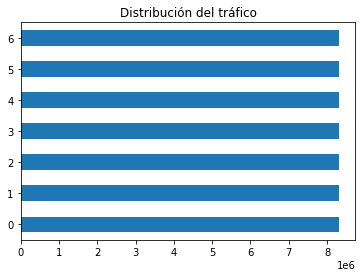

In [24]:
train_df['Label'].value_counts().plot(kind='barh')
plt.title('Distribución del tráfico')
train_df['Label'].value_counts()

In [25]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58248631 entries, 0 to 58248630
Data columns (total 23 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Dst Port           float64
 1   xhr                float64
 2   Fwd Pkt Len Max    float64
 3   Fwd Pkt Len Min    float64
 4   Fwd Pkt Len Mean   float64
 5   Bwd Pkt Len Min    float64
 6   Bwd Pkt Len Mean   float64
 7   Bwd IAT Tot        float64
 8   Bwd IAT Mean       float64
 9   Bwd IAT Max        float64
 10  Fwd PSH Flags      float64
 11  Fwd Pkts/s         float64
 12  Bwd Pkts/s         float64
 13  RST Flag Cnt       float64
 14  PSH Flag Cnt       float64
 15  ACK Flag Cnt       float64
 16  Init Fwd Win Byts  float64
 17  Init Bwd Win Byts  float64
 18  Fwd Seg Size Min   float64
 19  Idle Min           float64
 20  Protocol_6         float64
 21  Protocol_17        float64
 22  Label              int64  
dtypes: float64(22), int64(1)
memory usage: 10.0 GB


In [26]:
train_df.to_csv('train-RF.csv', index=False)

In [28]:
under_sampler = RandomUnderSampler(sampling_strategy={0:1000000,1:1000000,2:1000000,3:1000000,4:1000000,5:1000000,6:1000000})
X_train, y_train = under_sampler.fit_resample(X_train, y_train)

In [29]:
train_df = pd.DataFrame(X_train)
train_df.columns = ['Dst Port', 'xhr', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Max', 'Fwd PSH Flags', 'Fwd Pkts/s', 'Bwd Pkts/s', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Seg Size Min', 'Idle Min', 'Protocol_6', 'Protocol_17']
train_df['Label'] = np.array(y_train)

train_df

,Dst Port,xhr,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Max,Fwd PSH Flags,Fwd Pkts/s,Bwd Pkts/s,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,Idle Min,Protocol_6,Protocol_17,Label
0,0.000809,0.000000,0.018692,0.060897,0.026381,0.068864,0.050975,0.000000,0.000000,0.000000,0.0,1.406470e-04,4.219409e-04,0.0,0.0,0.0,0.000000,0.000000,0.142857,0.0,0.0,1.0,0
1,0.000809,0.500000,0.037383,0.121795,0.052762,0.149451,0.110626,0.000000,0.000000,0.000000,0.0,4.317789e-04,1.295337e-03,0.0,0.0,0.0,0.000000,0.000000,0.142857,0.0,0.0,1.0,0
2,0.006790,0.258819,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.031374e-06,1.031374e-06,0.0,1.0,0.0,0.125015,0.125015,0.357143,0.0,1.0,0.0,0
3,0.755413,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,7.936508e-03,0.000000e+00,0.0,0.0,1.0,0.002762,0.000000,0.357143,0.0,1.0,0.0,0
4,0.780774,0.258819,0.459911,0.000000,0.129822,0.000000,0.069051,0.000299,0.001192,0.001096,0.0,1.944864e-07,3.500755e-07,0.0,0.0,1.0,0.003357,0.003235,0.571429,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6999995,0.001221,0.258819,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.042766e-02,0.000000e+00,0.0,0.0,1.0,0.031337,0.000000,0.357143,0.0,1.0,0.0,6
6999996,0.001221,0.500000,0.317757,0.000000,0.249539,0.000000,0.377953,0.466681,0.036075,0.039614,0.0,4.553436e-07,9.285438e-07,1.0,1.0,0.0,0.125015,0.018753,0.357143,0.0,1.0,0.0,6
6999997,0.001221,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,3.166566e-03,0.000000e+00,0.0,0.0,1.0,0.031323,0.000000,0.357143,0.0,1.0,0.0,6
6999998,0.001221,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.282051e-02,0.000000e+00,0.0,0.0,1.0,0.031311,0.000000,0.357143,0.0,1.0,0.0,6


0    1000000
1    1000000
2    1000000
3    1000000
4    1000000
5    1000000
6    1000000
Name: Label, dtype: int64

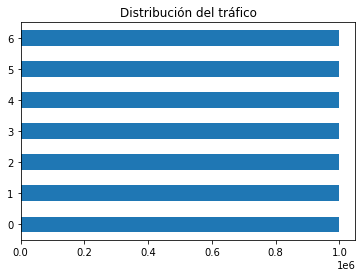

In [30]:
train_df['Label'].value_counts().plot(kind='barh')
plt.title('Distribución del tráfico')
train_df['Label'].value_counts()

In [32]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000000 entries, 0 to 6999999
Data columns (total 23 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Dst Port           float64
 1   xhr                float64
 2   Fwd Pkt Len Max    float64
 3   Fwd Pkt Len Min    float64
 4   Fwd Pkt Len Mean   float64
 5   Bwd Pkt Len Min    float64
 6   Bwd Pkt Len Mean   float64
 7   Bwd IAT Tot        float64
 8   Bwd IAT Mean       float64
 9   Bwd IAT Max        float64
 10  Fwd PSH Flags      float64
 11  Fwd Pkts/s         float64
 12  Bwd Pkts/s         float64
 13  RST Flag Cnt       float64
 14  PSH Flag Cnt       float64
 15  ACK Flag Cnt       float64
 16  Init Fwd Win Byts  float64
 17  Init Bwd Win Byts  float64
 18  Fwd Seg Size Min   float64
 19  Idle Min           float64
 20  Protocol_6         float64
 21  Protocol_17        float64
 22  Label              int64  
dtypes: float64(22), int64(1)
memory usage: 1.2 GB


In [33]:
train_df.to_csv('train-RF-reduced.csv', index=False)